# Lending Club Case Study

## Import packages

In [56]:
#Import necessary packages
import chardet
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
#check the encoding of input data:
with open('loan.csv','rb') as raw_data:
    result = chardet.detect(raw_data.read(2000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
#load the loan dataset
loan_data = pd.read_csv('loan.csv',dtype='unicode')

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
loan_data.shape

(39717, 111)

## Data cleaning|

In [6]:
null_count = loan_data.isnull().sum()
null_count

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Get the columns that does not have any data
null_count_df = pd.DataFrame({'column_name': loan_data.columns,
                            'null_count': null_count})
(null_count_df['null_count'] == 39717).sum()

54

There seems to be 54 columns with no data. These columns can be dropped.

In [8]:
#get the column names to be dropped.
columns_to_drop = null_count_df[null_count_df.null_count == 39717].column_name.tolist()
#columns_to_drop

In [9]:
#create new dataframe without the null columns
master_frame = loan_data.drop(columns_to_drop, axis = 1)
master_frame.shape

(39717, 57)

In [10]:
master_frame.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [11]:
#drop the column which are not affecting analysis
todrop_columnlist=['mths_since_last_record', 'mths_since_last_delinq','next_pymnt_d','desc','emp_title']
master_frame=master_frame.drop(todrop_columnlist,axis=1)

In [12]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)))

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util    

In [13]:
master_frame.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [14]:
#removing 'months' from term to make it numeric

master_frame['term']=master_frame.term.apply(lambda x:x.strip(" ")[0])
master_frame['term']=master_frame.term.astype(int)

In [15]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   member_id                   39717 non-null  object
 2   loan_amnt                   39717 non-null  object
 3   funded_amnt                 39717 non-null  object
 4   funded_amnt_inv             39717 non-null  object
 5   term                        39717 non-null  int32 
 6   int_rate                    39717 non-null  object
 7   installment                 39717 non-null  object
 8   grade                       39717 non-null  object
 9   sub_grade                   39717 non-null  object
 10  emp_length                  38642 non-null  object
 11  home_ownership              39717 non-null  object
 12  annual_inc                  39717 non-null  object
 13  verification_status         39717 non-null  ob

In [16]:
#convert amount columns into numeric data 
col_list=['loan_amnt','funded_amnt','funded_amnt_inv']
master_frame[col_list] = master_frame[col_list].apply(pd.to_numeric)

In [17]:
#removing % symbol from int_rate
master_frame['int_rate']=master_frame['int_rate'].apply(lambda x:x.rstrip("%"))
master_frame['int_rate']=master_frame['int_rate'].astype(float)

In [18]:
#convert emp_length column to numeric

master_frame['emp_length']=master_frame.emp_length.str.extract('(\d+)')
master_frame['emp_length']=pd.to_numeric(master_frame['emp_length'])

In [19]:
#convert remaining amount columns into numeric data 
col_list=['installment','annual_inc','dti','total_pymnt']
master_frame[col_list] = master_frame[col_list].apply(pd.to_numeric)

In [20]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  object 
 1   member_id                   39717 non-null  object 
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int32  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  float64
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

## Derive  new columns

In [21]:

master_frame.issue_d  = pd.to_datetime(master_frame.issue_d, format='%b-%y')
master_frame['year']=master_frame['issue_d'].dt.year
master_frame['month']=master_frame['issue_d'].dt.month


In [22]:
master_frame.head()
#we will drop 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,month
0,1077501,1296599,5000,5000,4975.0,3,10.65,162.87,B,B2,...,0,1,INDIVIDUAL,0,0,0,0,0,2011,12
1,1077430,1314167,2500,2500,2500.0,6,15.27,59.83,C,C4,...,0,1,INDIVIDUAL,0,0,0,0,0,2011,12
2,1077175,1313524,2400,2400,2400.0,3,15.96,84.33,C,C5,...,0,1,INDIVIDUAL,0,0,0,0,0,2011,12
3,1076863,1277178,10000,10000,10000.0,3,13.49,339.31,C,C1,...,0,1,INDIVIDUAL,0,0,0,0,0,2011,12
4,1075358,1311748,3000,3000,3000.0,6,12.69,67.79,B,B5,...,0,1,INDIVIDUAL,0,0,0,0,0,2011,12



## Univariate Analysis

<AxesSubplot:>

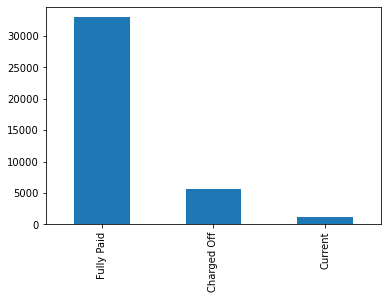

In [23]:
#Univariate Analysis of loan_status
master_frame.loan_status.value_counts().plot.bar()

In [24]:
#Now,we will drop the row with current loan_status as it is not going to affect th analysis
master_frame=master_frame.drop(master_frame[master_frame['loan_status']=='Current'].index)

<AxesSubplot:>

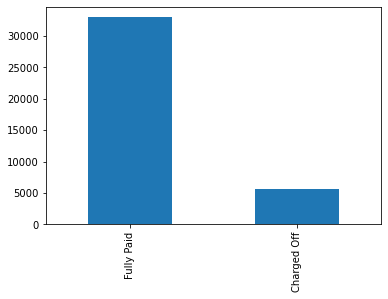

In [25]:
master_frame.loan_status.value_counts().plot.bar()

<AxesSubplot:xlabel='loan_amnt'>

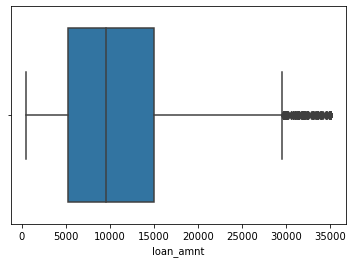

In [26]:
sns.boxplot(master_frame.loan_amnt)

<AxesSubplot:xlabel='total_pymnt'>

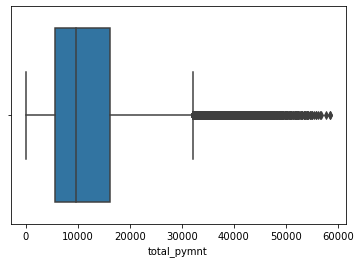

In [28]:
sns.boxplot(master_frame.total_pymnt)

<AxesSubplot:xlabel='annual_inc'>

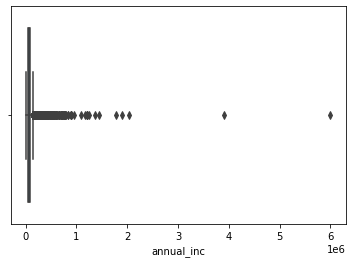

In [30]:
sns.boxplot(master_frame.annual_inc)

In [31]:
#we can detect outliners in the box plot,so we will remove the record more than 99 percentile
master_frame = master_frame[master_frame["annual_inc"] < master_frame["annual_inc"].quantile(0.99)]

<AxesSubplot:xlabel='annual_inc'>

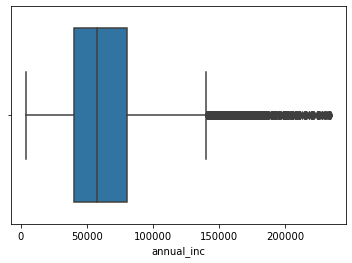

In [32]:
sns.boxplot(master_frame.annual_inc)

<AxesSubplot:xlabel='int_rate'>

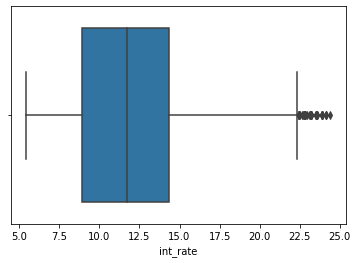

In [34]:
sns.boxplot(master_frame.int_rate)

<AxesSubplot:>

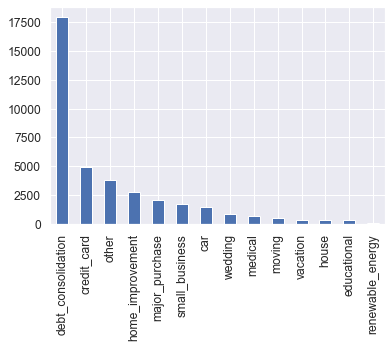

In [43]:
#frequency plot
master_frame.purpose.value_counts().plot.bar()

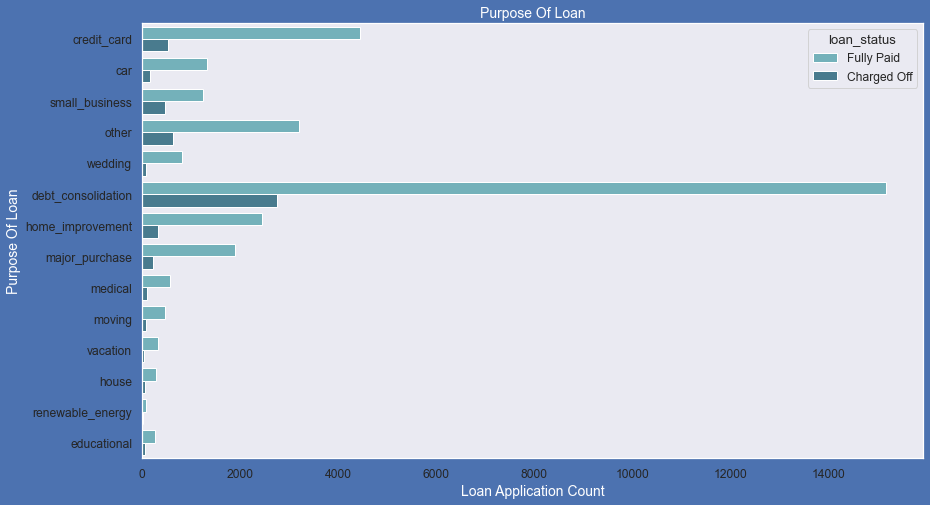

In [51]:
plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=master_frame,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

<AxesSubplot:>

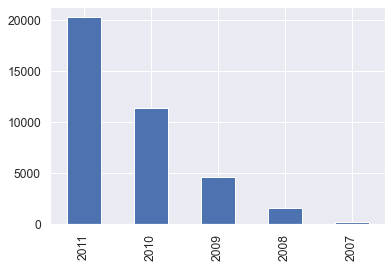

In [44]:
master_frame.year.value_counts().plot.bar()

<AxesSubplot:>

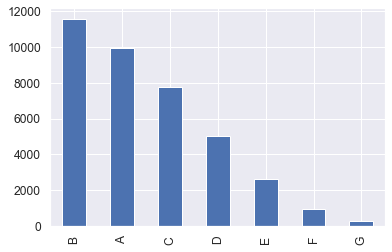

In [45]:
master_frame.grade.value_counts().plot.bar()

<AxesSubplot:>

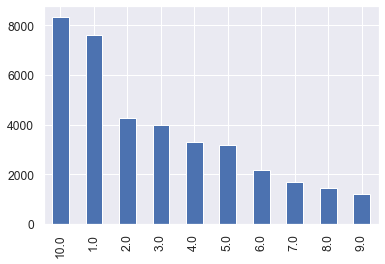

In [46]:
master_frame.emp_length.value_counts().plot.bar()

<AxesSubplot:>

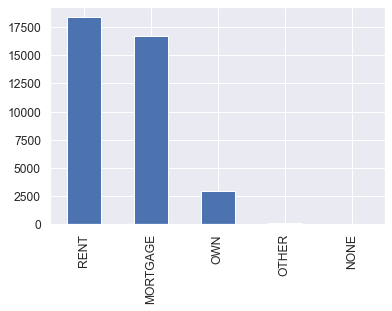

In [47]:
master_frame.home_ownership.value_counts().plot.bar()

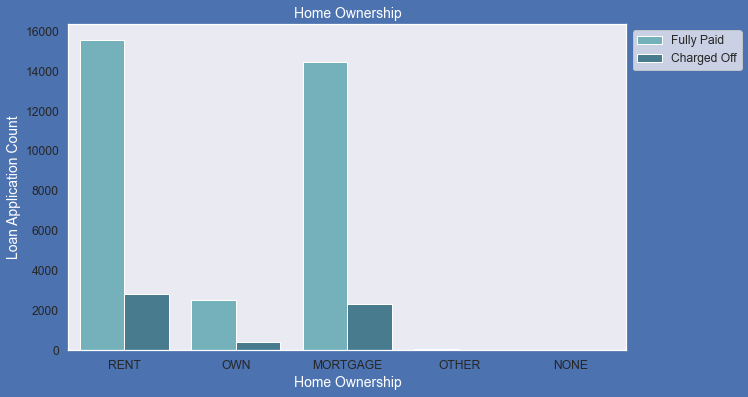

In [52]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=master_frame,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

In [ ]:
From the above plot we can see that
1)Most of the loans are fully paid
2)The  loan has been increasing over the years
3)Most of the loans are high graded loans
4)Most of the employee  applying for loans have more than 10 year of experience
5)Most of the loans are granted for debt_consolidation
6)

## Bivariate Analysis

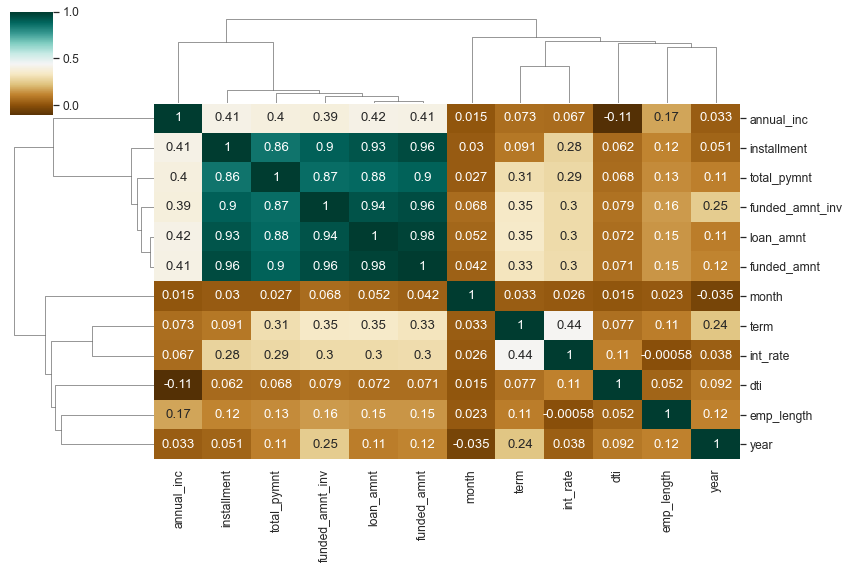

In [37]:
master_correlation = master_frame.corr()
sns.set(font_scale=1.1)
sns.clustermap(master_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

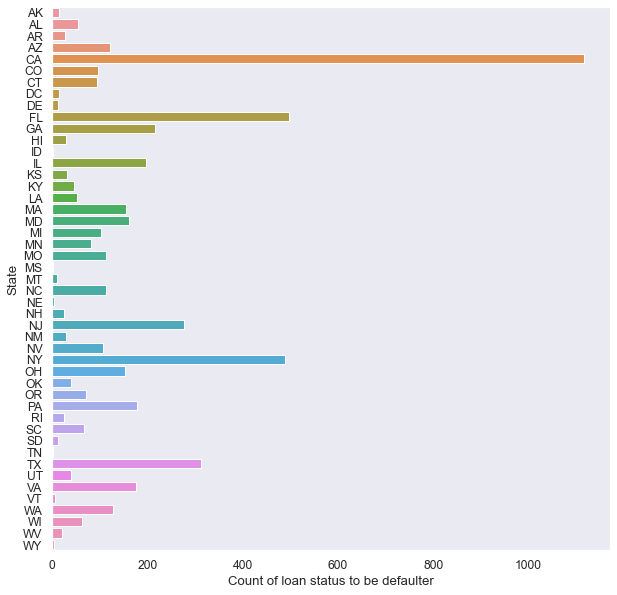

In [53]:
g = master_frame[master_frame['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

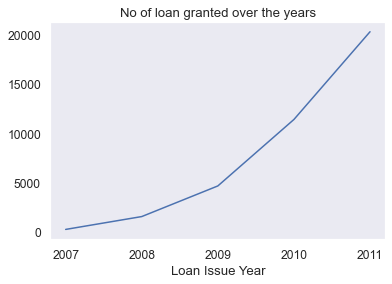

In [57]:
g = master_frame.groupby('year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()